In [1]:
!git clone https://github.com/FerdyBerlianoP/Internship1.git

fatal: destination path 'Internship1' already exists and is not an empty directory.


In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import math
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics

In [203]:
df= pd.read_excel('/content/Daily_vaksinasi.xlsx', parse_dates=['Tanggal'])
df=df.loc[118:270, ['Tanggal','Target Vaksinasi.3','Vaksinasi 1.3','Vaksinasi 2.3']]
df = df.rename(columns={'Target Vaksinasi.3': 'Target', 'Vaksinasi 1.3': 'Vaksinasi1', 'Vaksinasi 2.3': 'Vaksinasi2'})
#df.set_index('Tanggal', inplace=True)
df

,Tanggal,Target,Vaksinasi1,Vaksinasi2
118,2021-07-01,8815157,4498251,1924850
119,2021-07-02,8815157,4604297,1929114
120,2021-07-03,8815157,4682012,1931805
121,2021-07-04,8815157,4800657,1935269
122,2021-07-05,8815157,4827994,1935857
...,...,...,...,...
266,2021-11-26,8941211,11084245,8957716
267,2021-11-27,8941211,11089856,8967417
268,2021-11-28,8941211,11091875,8987124
269,2021-11-29,8941211,11093387,8992130


In [204]:
df.isna().sum()

Tanggal       0
Target        0
Vaksinasi1    0
Vaksinasi2    0
dtype: int64

In [205]:
df.describe()

,Target,Vaksinasi1,Vaksinasi2
count,1.530000e+02,1.530000e+02,1.530000e+02
mean,8.909903e+06,9.348219e+06,5.997830e+06
std,5.464241e+04,1.885768e+06,2.566139e+06
min,8.815157e+06,4.498251e+06,1.924850e+06
25%,8.941211e+06,8.371190e+06,3.415964e+06
50%,8.941211e+06,1.014367e+07,7.115084e+06
75%,8.941211e+06,1.081919e+07,8.245279e+06
max,8.941211e+06,1.110036e+07,9.014917e+06


In [206]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 118 to 270
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tanggal     153 non-null    datetime64[ns]
 1   Target      153 non-null    int64         
 2   Vaksinasi1  153 non-null    int64         
 3   Vaksinasi2  153 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 4.9 KB


## Outliers

In [207]:
def detect_outliers(df, x):
    Q1 = df[x].describe()['25%']
    Q3 = df[x].describe()['75%']
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]

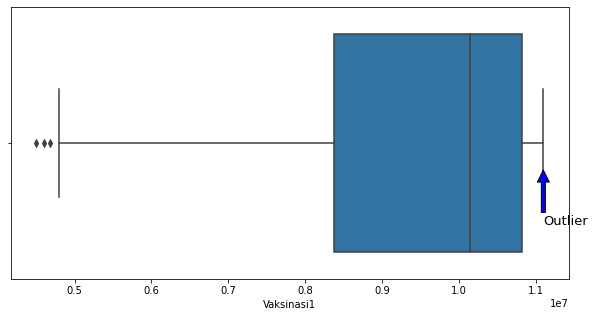

In [208]:
plt.figure(figsize = (10, 5))
sns.boxplot(df['Vaksinasi1'])
plt.annotate('Outlier', (df['Vaksinasi1'].describe()['max'],0.1), xytext = (df['Vaksinasi1'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['Vaksinasi1'].describe()['75%'] - df['Vaksinasi1'].describe()['25%']

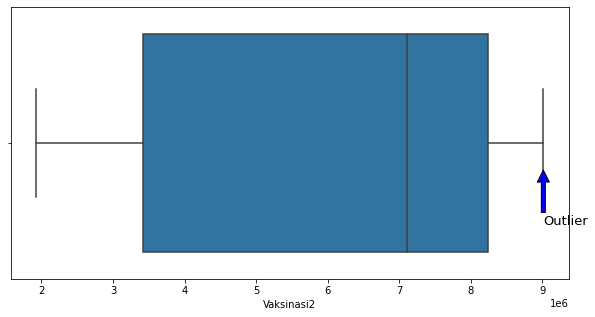

In [209]:
plt.figure(figsize = (10, 5))
sns.boxplot(df['Vaksinasi2'])
plt.annotate('Outlier', (df['Vaksinasi2'].describe()['max'],0.1), xytext = (df['Vaksinasi2'].describe()['max'],0.3),
             arrowprops = dict(facecolor = 'blue'), fontsize = 13 )
IQR = df['Vaksinasi2'].describe()['75%'] - df['Vaksinasi2'].describe()['25%']

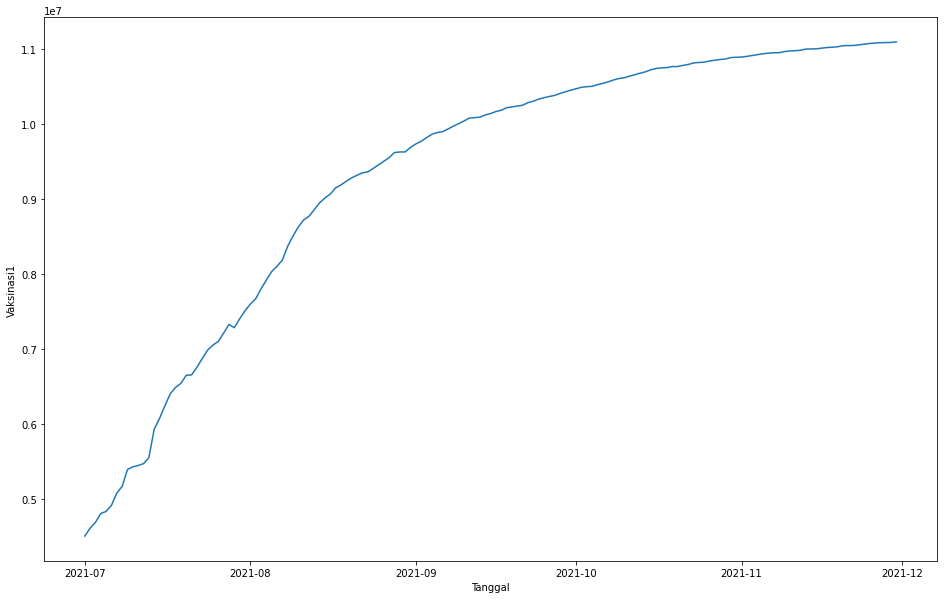

In [210]:
plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="Tanggal", y="Vaksinasi1")
#plt.plot('Tanggal','Vaksinasi1', data=df, color='tab:red')

In [211]:
y= df['Vaksinasi1'].values.reshape(-1,1)
X= df[['Target']].values.reshape(-1,1)

In [212]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=43,test_size=.3)

In [213]:
X_train.shape

(107, 1)

In [214]:
X_test.shape

(46, 1)

In [215]:
standardscaler=StandardScaler()
X_train=standardscaler.fit_transform(X_train)

In [216]:
X_test=standardscaler.transform(X_test)

In [217]:
model=AdaBoostRegressor()
model.fit(X_train,y_train)

AdaBoostRegressor()

In [218]:
model.score(X_test,y_test)

0.8204121384466656

In [219]:
print('Correlation: ', math.sqrt(model.score(X_test,y_test)))

Correlation:  0.9057660506149839


In [221]:
y_prediksi = model.predict(X_test)

In [222]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test,y_prediksi)) 
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test,y_prediksi))) 

Mean Absolute Error (MAE): 663424.2109500807
Root Mean Squared Error (RMSE): 862870.5766274539
